## Loading & Understanding Data 

In [1]:
#importing library 

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm  
from pylab import rcParams
import numpy as np 
import seaborn as sns


from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
data=pd.read_csv("projectdata.xlsx - sheet 1.csv")
data


,quantity,UnitePrice,discount,date,retail price,product_name,area,city
0,33,16.0,20.0,2021-10-29T03:33:52Z,16.0,product y,Bahary,North
1,30,16.0,20.0,2021-10-23T12:29:27Z,16.0,product y,Dar El-Salam,Cairo
2,2,45.0,30.0,2021-08-03T09:14:16Z,45.0,product z,Miamy,North
3,3,16.0,3.0,2021-08-17T09:00:50Z,16.0,product y,Miamy,North
4,1,45.0,27.0,2021-09-06T19:57:02Z,45.0,product z,Miamy,North
...,...,...,...,...,...,...,...,...
2990,2,99.0,33.0,2022-12-05T09:48:42Z,99.0,product x,Dokki and Mohandessin,Giza
2991,2,99.0,33.0,2022-12-21T00:00:28Z,99.0,product x,Dokki and Mohandessin,Giza
2992,5,45.0,31.0,2022-12-27T08:43:38Z,45.0,product z,Dokki and Mohandessin,Giza
2993,1,99.0,32.0,2022-11-26T09:16:45Z,0.0,product x,El-Agamy,North


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      2995 non-null   int64  
 1   UnitePrice    2995 non-null   float64
 2   discount      2995 non-null   float64
 3   date          2995 non-null   object 
 4   retail price  2995 non-null   float64
 5   product_name  2995 non-null   object 
 6   area          2970 non-null   object 
 7   city          2995 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 187.3+ KB
None


In [4]:
# Descriptive statistics
print(data.describe())

          quantity   UnitePrice     discount  retail price
count  2995.000000  2995.000000  2995.000000   2995.000000
mean      7.705509    60.555426    25.917225     59.615776
std     100.466019    35.270286    14.124298     36.944778
min       1.000000    10.000000    -1.000000      0.000000
25%       2.000000    16.000000    20.000000     16.000000
50%       3.000000    45.000000    31.000000     45.000000
75%       5.000000    99.000000    33.000000     99.000000
max    5000.000000   102.000000   561.000000    102.000000


In [5]:
unique_cities = data['city'].nunique()

unique_cities

3

In [6]:
# Group the data by 'product_name' and 'city', and get the most frequent 'area' for each combination
most_frequent_area = data.groupby(['product_name', 'city'])['area'].agg(lambda x: x.mode()[0])
most_frequent_area

product_name  city 
product x     Cairo          Nasr City
              Giza     El-Sheikh Zayed
              North           El-Agamy
product y     Cairo          Nasr City
              Giza     El-Sheikh Zayed
              North          El-Seyouf
product z     Cairo          Nasr City
              Giza              Faisal
              North          El-Seyouf
Name: area, dtype: object

/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_32153/936733732.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


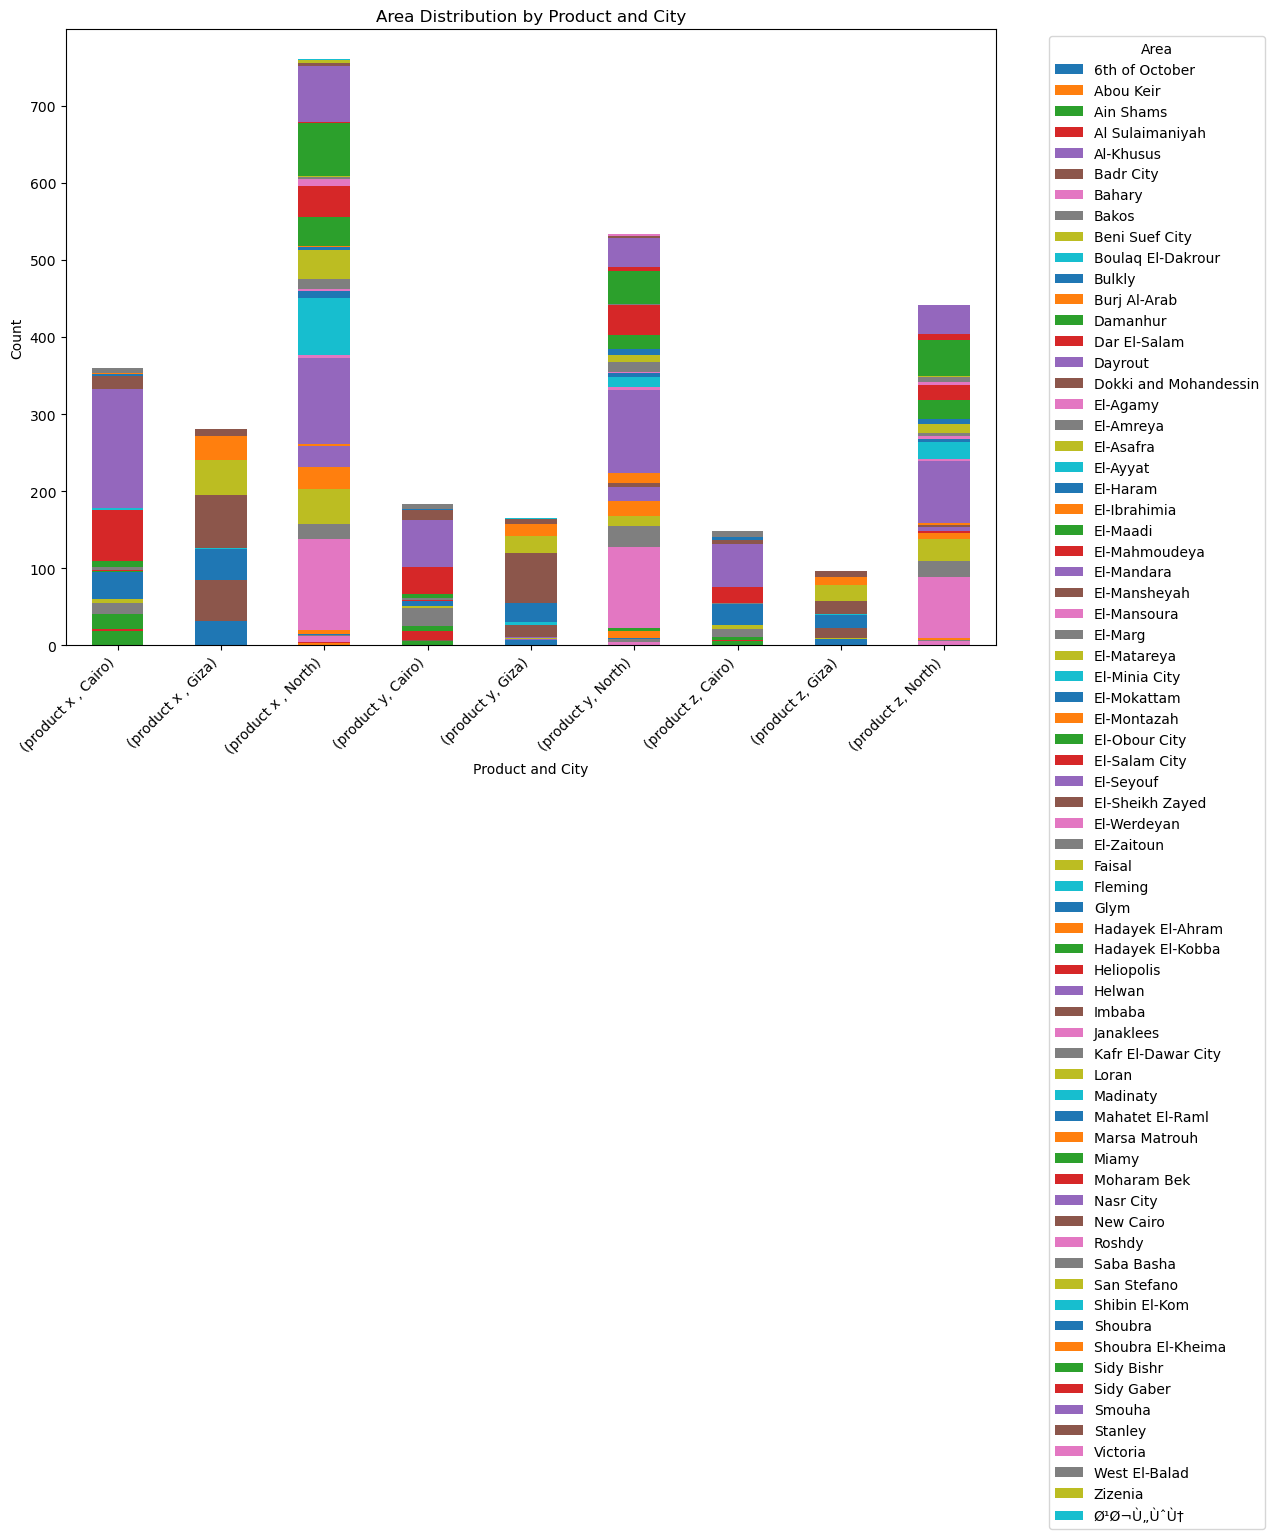

In [7]:
area_distribution = data.groupby(['product_name', 'city', 'area']).size().unstack(fill_value=0)

area_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Area Distribution by Product and City')
plt.ylabel('Count')
plt.xlabel('Product and City')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()



### Handling missing values

In [8]:
# Check for missing values in each column
missing_values = data.isnull().sum()

missing_columns = missing_values[missing_values > 0]
print(missing_columns)


area    25
dtype: int64


In [9]:
def impute_area(row):
    if pd.isnull(row['area']):
        # Get the most frequent 'area' for the combination of 'product_name' and 'city'
        imputed_area = most_frequent_area.loc[(row['product_name'], row['city'])]
        return imputed_area
    return row['area']

In [10]:

data['area'] = data.apply(impute_area, axis=1)

In [11]:
missing_values = data.isnull().sum()

missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


#### Visualize Original data and inspect

/Users/ayasamir/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayasamir/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


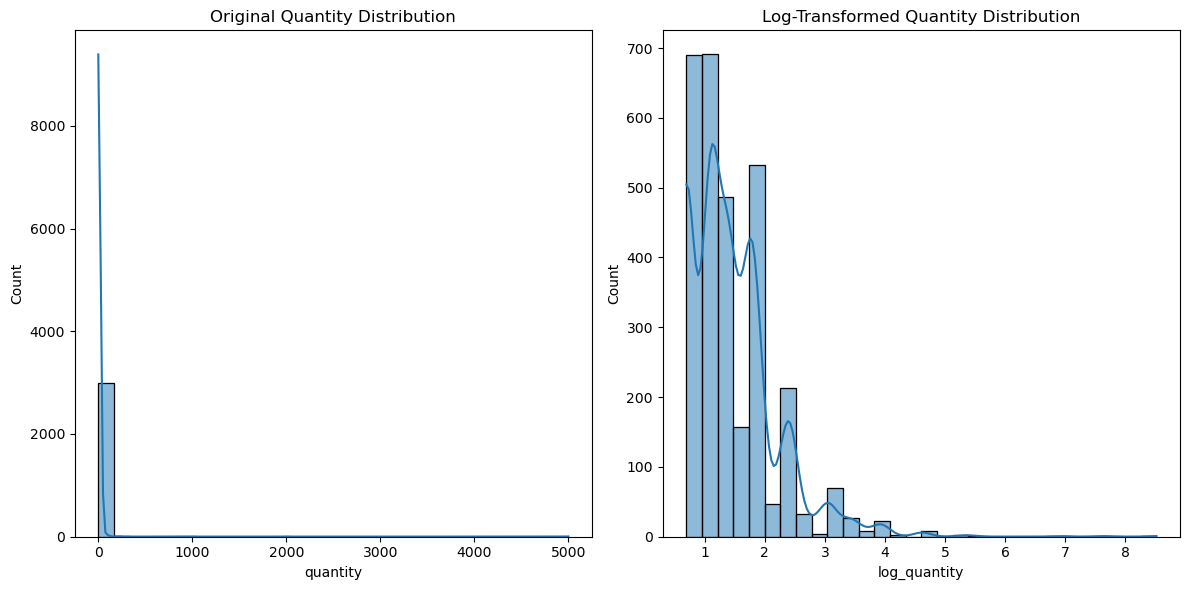

In [12]:
#  Apply log transformation to the 'quantity' column
data['log_quantity'] = np.log1p(data['quantity'])  # log(1 + quantity)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['quantity'], bins=30, kde=True)
plt.title('Original Quantity Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['log_quantity'], bins=30, kde=True)
plt.title('Log-Transformed Quantity Distribution')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

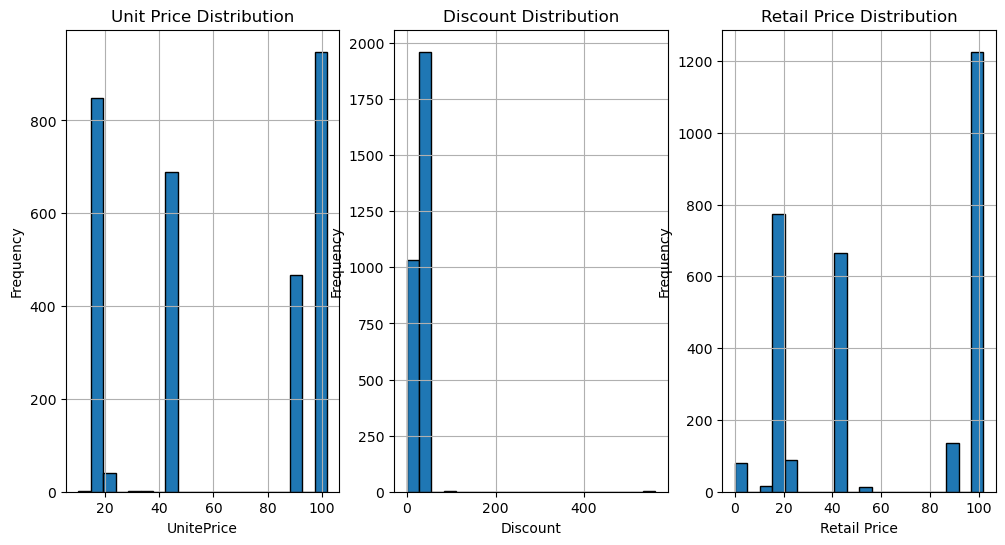

In [13]:
# Price and Discount Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
data['UnitePrice'].hist(bins=20, edgecolor='black')
plt.title('Unit Price Distribution')
plt.xlabel('UnitePrice')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
data['discount'].hist(bins=20, edgecolor='black')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
data['retail price'].hist(bins=20, edgecolor='black')
plt.title('Retail Price Distribution')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

### Detecting outliers 

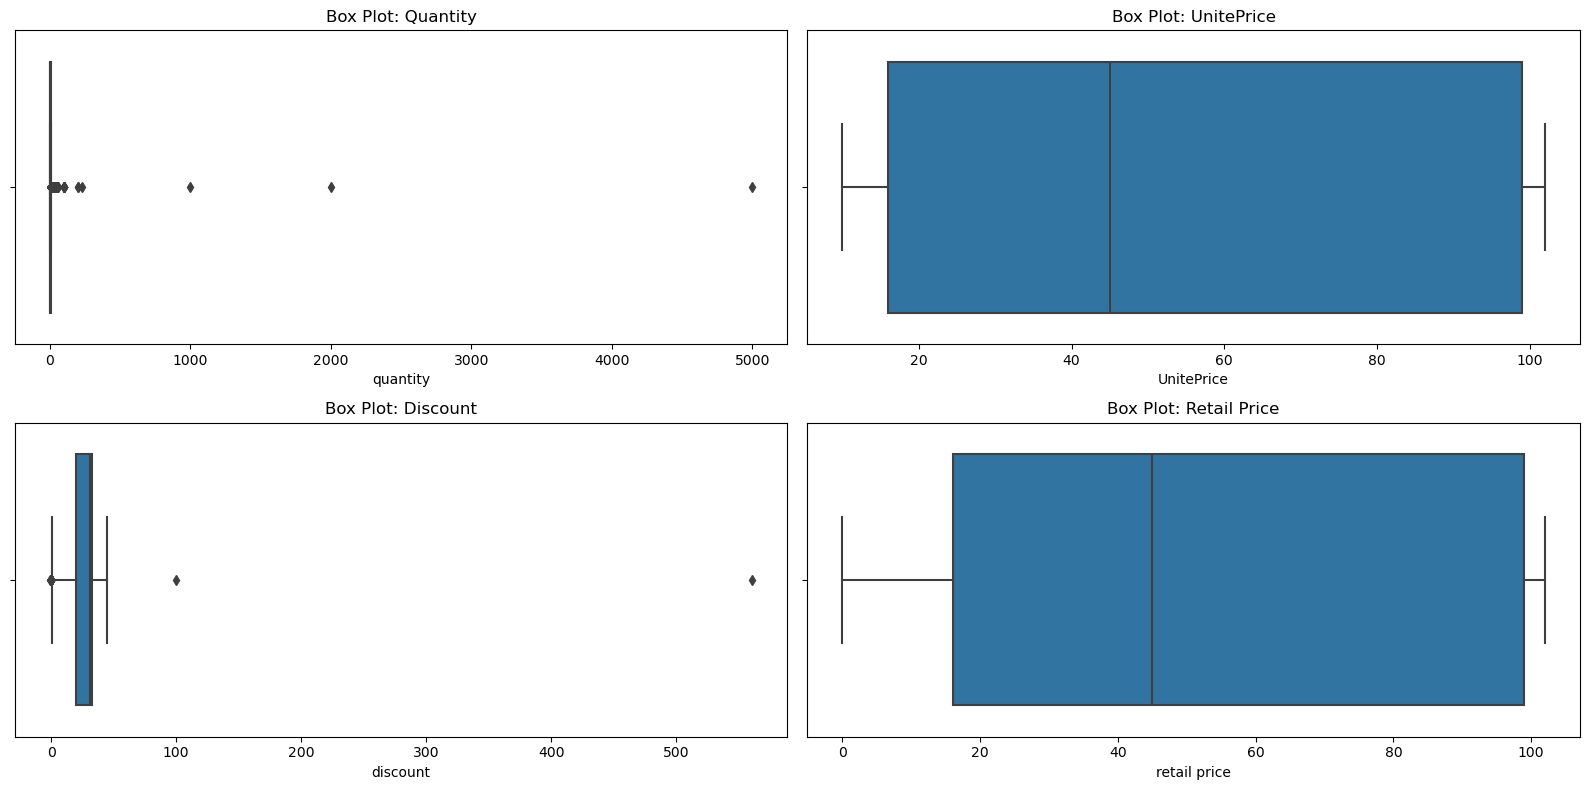

,quantity,UnitePrice,discount,retail price
count,2995.000000,2995.000000,2995.000000,2995.000000
mean,7.705509,60.555426,25.917225,59.615776
std,100.466019,35.270286,14.124298,36.944778
min,1.000000,10.000000,-1.000000,0.000000
25%,2.000000,16.000000,20.000000,16.000000
50%,3.000000,45.000000,31.000000,45.000000
75%,5.000000,99.000000,33.000000,99.000000
max,5000.000000,102.000000,561.000000,102.000000


In [14]:
# Summary statistics for  columns: 'quantity', 'UnitePrice', 'discount', and 'retail price'
summary_stats = data[['quantity', 'UnitePrice', 'discount', 'retail price']].describe()

import seaborn as sns
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['quantity'])
plt.title('Box Plot: Quantity')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['UnitePrice'])
plt.title('Box Plot: UnitePrice')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['discount'])
plt.title('Box Plot: Discount')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['retail price'])
plt.title('Box Plot: Retail Price')

plt.tight_layout()
plt.show()


summary_stats



In [15]:
# Determine the 99th percentile for the 'quantity' column
quantity_99th_percentile = data['quantity'].quantile(0.99)

data['quantity'] = np.where(data['quantity'] > quantity_99th_percentile, quantity_99th_percentile, data['quantity'])

capped_data_count = (data['quantity'] == quantity_99th_percentile).sum()

print(f"Number of rows capped: {capped_data_count}")
print(f"99th Percentile for 'quantity': {quantity_99th_percentile}")


Number of rows capped: 37
99th Percentile for 'quantity': 50.0


In [16]:
#rows_to_be_capped = data[data['quantity'] > quantity_99th_percentile]
#rows_to_be_capped

In [17]:

# Determine the 1st and 99th percentiles for the 'discount' column for winsorization
discount_1st_percentile = data['discount'].quantile(0.01)
discount_99th_percentile = data['discount'].quantile(0.99)

print(f"1st Percentile: {discount_1st_percentile}, 99th Percentile: {discount_99th_percentile}")

data['discount'] = np.clip(data['discount'], discount_1st_percentile, discount_99th_percentile)

capped_rows = ((data['discount'] == discount_1st_percentile) | (data['discount'] == discount_99th_percentile)).sum()

print(f"Number of capped rows: {capped_rows}")


1st Percentile: 0.0, 99th Percentile: 36.0
Number of capped rows: 154


In [18]:
data.describe()

,quantity,UnitePrice,discount,retail price,log_quantity
count,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000
mean,4.783306,60.555426,25.714554,59.615776,1.449944
std,7.030337,35.270286,10.093681,36.944778,0.719563
min,1.000000,10.000000,0.000000,0.000000,0.693147
25%,2.000000,16.000000,20.000000,16.000000,1.098612
50%,3.000000,45.000000,31.000000,45.000000,1.386294
75%,5.000000,99.000000,33.000000,99.000000,1.791759
max,50.000000,102.000000,36.000000,102.000000,8.517393


Outliers are handled

In [19]:
# Convert the 'date' column to datetime format and index by date
data['date'] = pd.to_datetime(data['date'])

# Extract only the date 
data['date'] = data['date'].dt.date

data.set_index('date', inplace=True)


In [20]:
data

,quantity,UnitePrice,discount,retail price,product_name,area,city,log_quantity
date,,,,,,,,
2021-10-29,33.0,16.0,20.0,16.0,product y,Bahary,North,3.526361
2021-10-23,30.0,16.0,20.0,16.0,product y,Dar El-Salam,Cairo,3.433987
2021-08-03,2.0,45.0,30.0,45.0,product z,Miamy,North,1.098612
2021-08-17,3.0,16.0,3.0,16.0,product y,Miamy,North,1.386294
2021-09-06,1.0,45.0,27.0,45.0,product z,Miamy,North,0.693147
...,...,...,...,...,...,...,...,...
2022-12-05,2.0,99.0,33.0,99.0,product x,Dokki and Mohandessin,Giza,1.098612
2022-12-21,2.0,99.0,33.0,99.0,product x,Dokki and Mohandessin,Giza,1.098612
2022-12-27,5.0,45.0,31.0,45.0,product z,Dokki and Mohandessin,Giza,1.791759


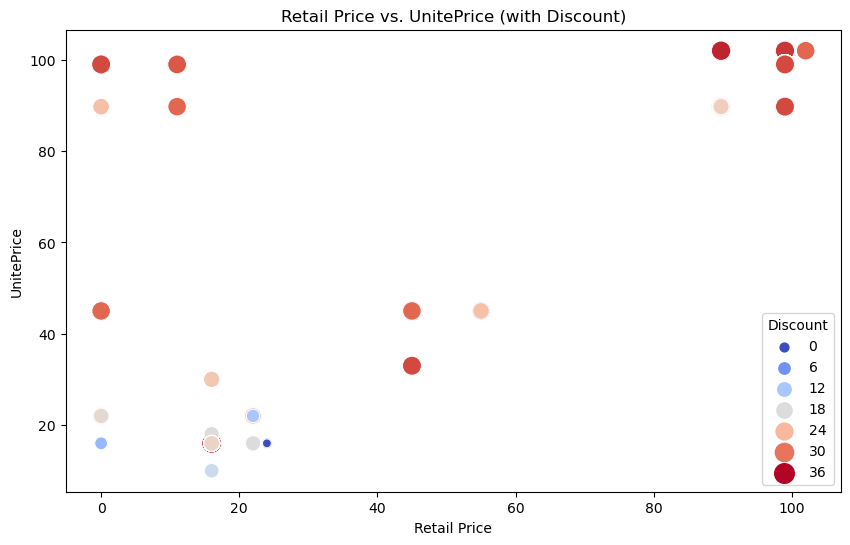

In [21]:


plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='retail price', y='UnitePrice', hue='discount', 
                          size='discount', sizes=(40, 200), palette='coolwarm')

plt.title('Retail Price vs. UnitePrice (with Discount)')
plt.xlabel('Retail Price')
plt.ylabel('UnitePrice')

plt.legend(title='Discount')
plt.show()

## Feature Engineering

In [22]:
#Add   total sales (revenue) column
data['sales'] = (data['UnitePrice']) * data['quantity']

/Users/ayasamir/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


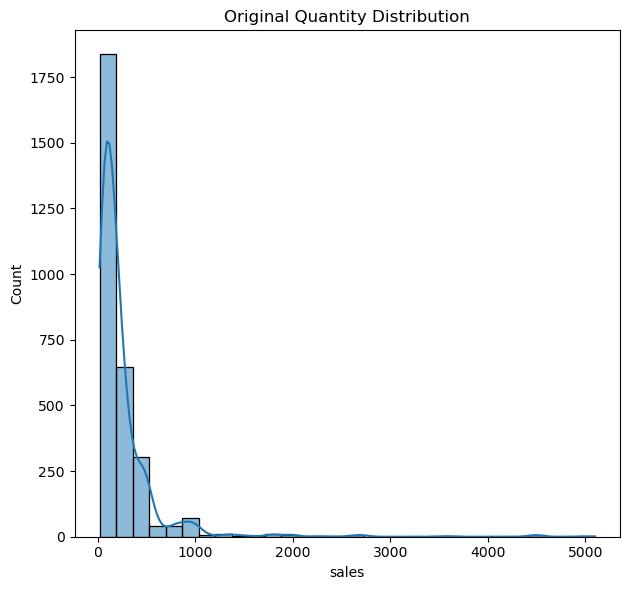

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['sales'], bins=30, kde=True)
plt.title('Original Quantity Distribution')
plt.tight_layout()
plt.show()


/Users/ayasamir/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


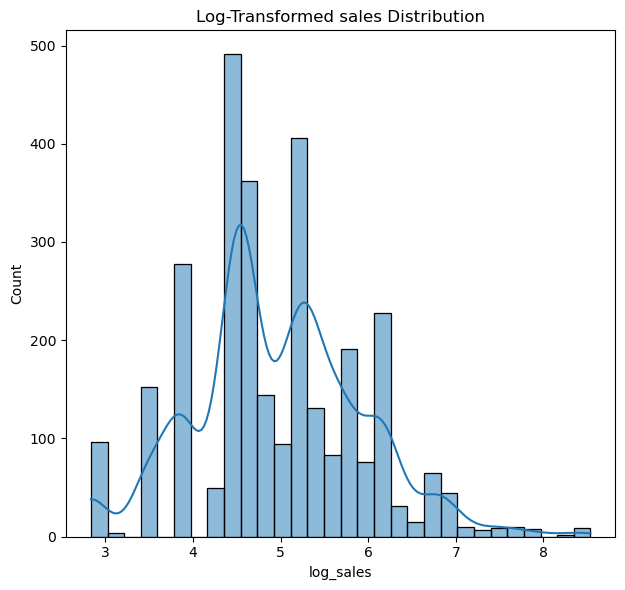

In [24]:
# Apply log transformation to the 'quantity' column
data['log_sales'] = np.log1p(data['sales'])  # log(1 + quantity)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.histplot(data['log_sales'], bins=30, kde=True)
plt.title('Log-Transformed sales Distribution')

plt.tight_layout()
plt.show()


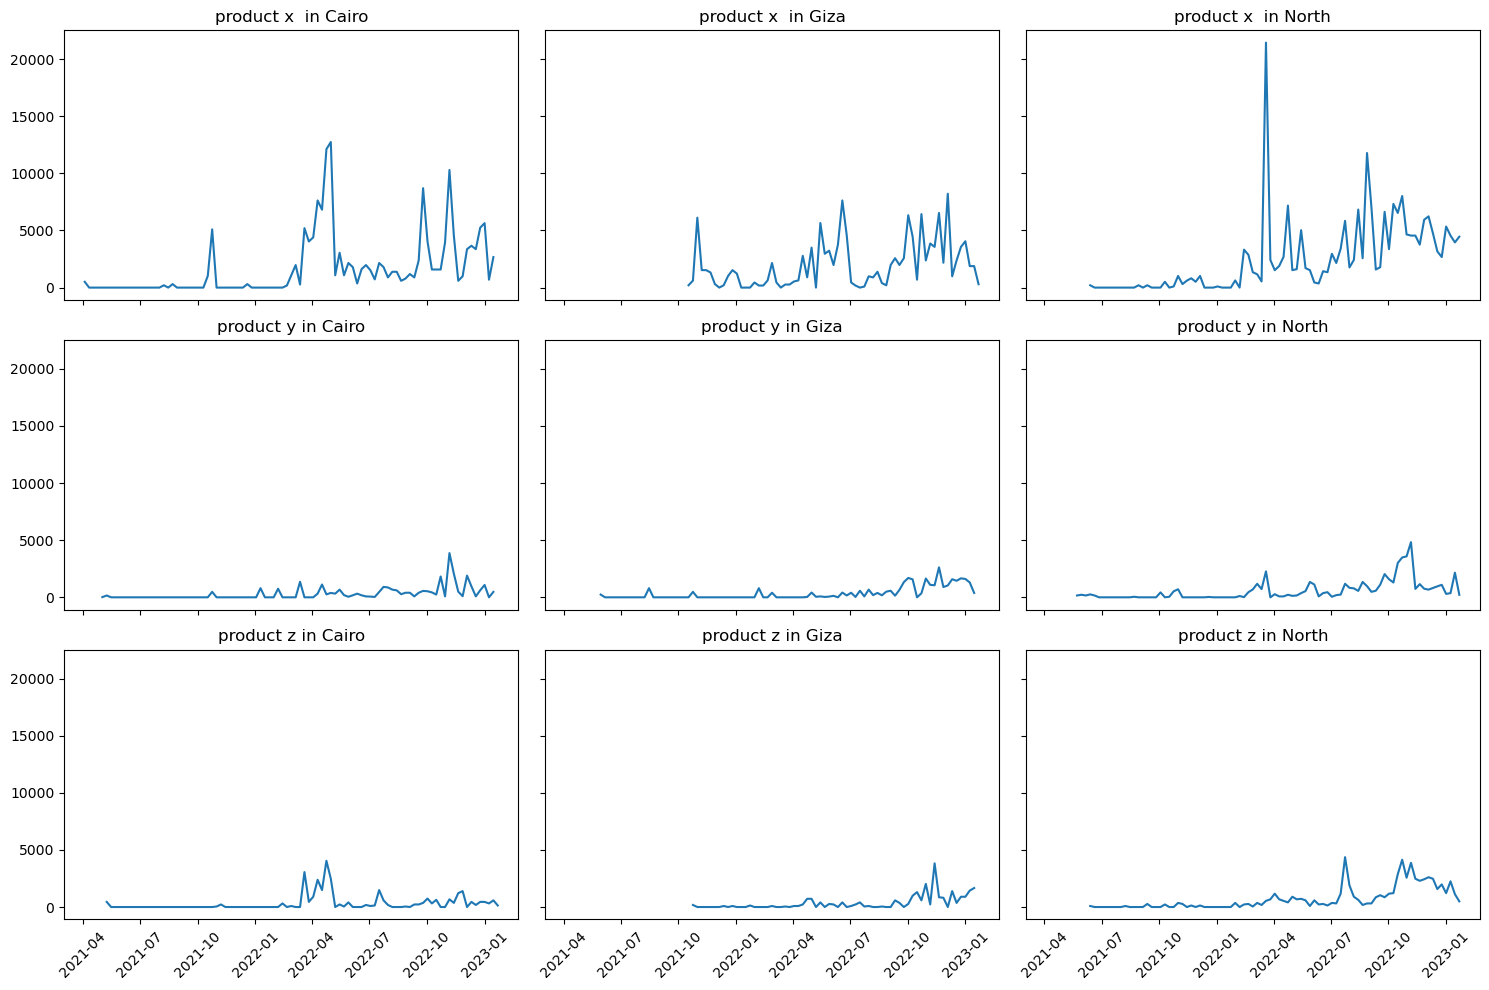

In [25]:
data.index = pd.to_datetime(data.index)

#  resample by week and sum the values
data_grouped = data.groupby(['product_name', 'city']).resample('W').sum()

# Reset the index, but avoid duplicating columns (such as 'product_name', 'city')
data_grouped = data_grouped.reset_index(level=['date'])  # Reset only the 'date' index


products = data_grouped.index.get_level_values('product_name').unique()
cities = data_grouped.index.get_level_values('city').unique()


fig, axs = plt.subplots(len(products), len(cities), figsize=(15, 10), sharex=True, sharey=True)

for i, product in enumerate(products):
    for j, city in enumerate(cities):
        city_product_data = data_grouped.xs((product, city), level=('product_name', 'city'))
        axs[i, j].plot(city_product_data['date'], city_product_data['sales'], label=f'{product} in {city}')
        axs[i, j].set_title(f'{product} in {city}')
        axs[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [26]:
data_grouped

date  quantity  UnitePrice  discount  retail price  \
product_name city                                                             
product x    Cairo 2021-04-04       5.0       102.0      33.0         102.0   
             Cairo 2021-04-11       0.0         0.0       0.0           0.0   
             Cairo 2021-04-18       0.0         0.0       0.0           0.0   
             Cairo 2021-04-25       0.0         0.0       0.0           0.0   
             Cairo 2021-05-02       0.0         0.0       0.0           0.0   
...                       ...       ...         ...       ...           ...   
product z    North 2022-12-25      44.0       675.0     463.0         450.0   
             North 2023-01-01      27.0       450.0     293.0         450.0   
             North 2023-01-08      50.0       900.0     579.0         875.0   
             North 2023-01-15      25.0       405.0     271.0         405.0   
             North 2023-01-22      11.0       135.0      85.0         135.0   

                                                         product_name  \
product_name city                                                       
product x    Cairo                                         product x    
             Cairo                                                  0   
             Cairo                                                  0   
             Cairo                                                  0   
             Cairo                                                  0   
...                                                               ...   
product z    North  product zproduct zproduct zproduct zproduct zp...   
             North  product zproduct zproduct zproduct zproduct zp...   
             North  product zproduct zproduct zproduct zproduct zp...   
             North  product zproduct zproduct zproduct zproduct zp...   
             North                        product zproduct zproduct z   

                                                                 area  \
product_name city                                                       
product x    Cairo                                        El-Mokattam   
             Cairo                                                  0   
             Cairo                                                  0   
             Cairo                                                  0   
             Cairo                                                  0   
...                                                               ...   
product z    North  El-AgamySmouhaFlemingEl-AgamyMahatet El-RamlMo...   
             North  El-SeyoufSidy BishrSaba BashaMoharam BekSmouha...   
             North  El-AgamySidy GaberSaba BashaRoshdyFlemingEl-Ag...   
             North  BaharySaba BashaSaba BashaEl-AgamyEl-AgamyEl-A...   
             North                        LoranSidy BishrEl-Ibrahimia   

                                                                 city  \
product_name city                                                       
product x    Cairo                                              Cairo   
             Cairo                                                  0   
             Cairo                                                  0   
             Cairo                                                  0   
             Cairo                                                  0   
...                                                               ...   
product z    North  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
             North  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
             North  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
             North      NorthNorthNorthNorthNorthNorthNorthNorthNorth   
             North                                    NorthNorthNorth   

                    log_quantity   sales  log_sales  
product_name city                                    
product x    Cairo      1.791759   510.

### Handling Missing Dates 

In [27]:


data.index = pd.to_datetime(data.index)

# Then normalize the index to remove the time component
data.index = data.index.normalize()


missing_dates = pd.date_range(start=data.index.min(), end=data.index.max()).difference(data.index)
print(f"Missing dates: {missing_dates}")


Missing dates: DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10',
               ...
               '2022-03-09', '2022-03-11', '2022-05-02', '2022-06-03',
               '2022-06-17', '2022-07-08', '2022-07-09', '2022-09-02',
               '2022-09-16', '2022-09-23'],
              dtype='datetime64[ns]', length=251, freq=None)


In [28]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

# Simulate missing values in the test set
def simulate_missing_data(data, missing_rate=0.1):
    np.random.seed(42)
    missing_indices = np.random.choice(data.index, size=int(len(data) * missing_rate), replace=False)
    data_with_missing = data.copy()
    data_with_missing.loc[missing_indices] = np.nan
    return data_with_missing

# Cross-validation for time series imputation evaluation
def time_series_cross_validation(city_data, city_name, imputation_methods):
    tscv = TimeSeriesSplit(n_splits=5)  
    results = []  
    
    for train_index, test_index in tscv.split(city_data):
        train_data, test_data = city_data.iloc[train_index], city_data.iloc[test_index]
        
        
        test_data_with_missing = simulate_missing_data(test_data['quantity'], missing_rate=0.2)

        print(f"\nEvaluating different imputation methods for {city_name} on this split...")
        
        for method, imputation_func in imputation_methods.items():
            # Impute the missing values on the test data
            test_data_imputed = test_data_with_missing.copy()
            test_data_imputed = imputation_func(test_data_imputed)
            
            # Align and evaluate imputation
            actual_values = test_data['quantity']  
            imputed_values = test_data_imputed.dropna()  
            
            common_indices = imputed_values.index.intersection(actual_values.index)
            actual_values_aligned = actual_values.loc[common_indices]
            imputed_values_aligned = imputed_values.loc[common_indices]

            # Ensure consistent lengths before calculating MAE
            if len(actual_values_aligned) != len(imputed_values_aligned):
                print(f"Inconsistent lengths for {method}: {len(actual_values_aligned)} vs {len(imputed_values_aligned)}")
                continue  # Skip if lengths are inconsistent

            # Calculate the Mean Absolute Error (MAE)
            mae = mean_absolute_error(actual_values_aligned, imputed_values_aligned)
            print(f"Imputation Method: {method}, MAE: {mae:.4f}")

            # Store the results
            results.append({
                'city': city_name,
                'method': method,
                'mae': mae
            })

    return results 

# Define imputation methods
def forward_fill(series):
    return series.ffill().bfill()  # Forward fill followed by backward fill

def backward_fill(series):
    return series.bfill().ffill()  # Backward fill followed by forward fill

def linear_interpolate(series):
    return series.interpolate(method='linear').ffill().bfill()  # Interpolate with forward/backward fill fallback



all_results = []



In [29]:
imputation_methods = {
    'Forward Fill': forward_fill,
    'Backward Fill': backward_fill,
    'Linear Interpolation': linear_interpolate
}

for city_name, city_data in data.groupby('city'):
    city_results = time_series_cross_validation(city_data, city_name, imputation_methods)
    all_results.extend(city_results)


results_df = pd.DataFrame(all_results)

best_methods_per_city = results_df.loc[results_df.groupby('city')['mae'].idxmin()]

print("\nBest Imputation Method for Each City:")
print(best_methods_per_city)



Evaluating different imputation methods for Cairo on this split...
Imputation Method: Forward Fill, MAE: 0.6923
Imputation Method: Backward Fill, MAE: 0.6752
Imputation Method: Linear Interpolation, MAE: 0.5869

Evaluating different imputation methods for Cairo on this split...
Imputation Method: Forward Fill, MAE: 0.5726
Imputation Method: Backward Fill, MAE: 0.5983
Imputation Method: Linear Interpolation, MAE: 0.5712

Evaluating different imputation methods for Cairo on this split...
Imputation Method: Forward Fill, MAE: 2.9060
Imputation Method: Backward Fill, MAE: 1.9573
Imputation Method: Linear Interpolation, MAE: 2.4174

Evaluating different imputation methods for Cairo on this split...
Imputation Method: Forward Fill, MAE: 0.6068
Imputation Method: Backward Fill, MAE: 1.3248
Imputation Method: Linear Interpolation, MAE: 0.9231

Evaluating different imputation methods for Cairo on this split...
Imputation Method: Forward Fill, MAE: 1.3761
Imputation Method: Backward Fill, MAE: 

In [30]:
# Function to assign cities to missing dates based on nearest available dates
def assign_cities_to_missing_dates(data, missing_dates):
    data_sorted = data.sort_index()
    assigned_cities = []
    
    for missing_date in missing_dates:
        differences = (data_sorted.index - missing_date).total_seconds()
        nearest_index = np.argmin(np.abs(differences))
        
        # Assign the city from the nearest available date
        city = data_sorted.iloc[nearest_index]['city']
        assigned_cities.append(city)

    return assigned_cities




In [31]:
full_date_range = pd.date_range(start=data.index.min(), end=data.index.max())

missing_dates = full_date_range.difference(data.index)

assigned_cities = assign_cities_to_missing_dates(data, missing_dates)

missing_data = pd.DataFrame(index=missing_dates, columns=data.columns)
missing_data['city'] = assigned_cities

combined_data = pd.concat([data, missing_data]).sort_index()



/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_32153/3954942545.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([data, missing_data]).sort_index()


In [32]:
combined_data


,quantity,UnitePrice,discount,retail price,product_name,area,city,log_quantity,sales,log_sales
2021-03-31,5.0,102.0,33.0,102.0,product x,El-Mokattam,Cairo,1.791759,510.0,6.236370
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Cairo,NaN,NaN,NaN
2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,Cairo,NaN,NaN,NaN
2021-04-03,NaN,NaN,NaN,NaN,NaN,NaN,Cairo,NaN,NaN,NaN
2021-04-04,NaN,NaN,NaN,NaN,NaN,NaN,Cairo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-17,5.0,99.0,28.0,99.0,product x,Fleming,North,1.791759,495.0,6.206576
2023-01-17,3.0,99.0,29.0,99.0,product x,Faisal,Giza,1.386294,297.0,5.697093
2023-01-17,1.0,99.0,27.0,99.0,product x,El-Ibrahimia,North,0.693147,99.0,4.605170
2023-01-17,2.0,99.0,27.0,99.0,product x,Moharam Bek,North,1.098612,198.0,5.293305


In [33]:
# Define imputation methods for each city (for numerical columns)
def linear_interpolate(series):
    return series.interpolate(method='linear').ffill().bfill()

def backward_fill(series):
    return series.bfill().ffill()

def impute_categorical(data):
    return data.ffill().bfill()

def mode_impute(series):
    return series.fillna(series.mode()[0]) if not series.mode().empty else series

def impute_missing_values(data):
    cities_methods = {
        'Cairo': linear_interpolate,
        'Giza': backward_fill,
        'North': linear_interpolate
    }

    for city, method in cities_methods.items():
        city_data = data[data['city'] == city]
        
        data.loc[data['city'] == city, 'quantity'] = method(city_data['quantity'])
        data.loc[data['city'] == city, 'UnitePrice'] = method(city_data['UnitePrice'])
        data.loc[data['city'] == city, 'discount'] = method(city_data['discount'])
        data.loc[data['city'] == city, 'retail price'] = method(city_data['retail price'])
        
        # Impute missing values for categorical columns using mode
        categorical_columns = ['product_name','area']
        for col in categorical_columns:
            data.loc[data['city'] == city, col] = mode_impute(city_data[col])
    
    return data


In [34]:
final_data = impute_missing_values(combined_data)
final_data

,quantity,UnitePrice,discount,retail price,product_name,area,city,log_quantity,sales,log_sales
2021-03-31,5.000000,102.000000,33.0,102.000000,product x,El-Mokattam,Cairo,1.791759,510.0,6.236370
2021-04-01,4.866667,99.133333,32.2,99.133333,product x,Nasr City,Cairo,NaN,NaN,NaN
2021-04-02,4.733333,96.266667,31.4,96.266667,product x,Nasr City,Cairo,NaN,NaN,NaN
2021-04-03,4.600000,93.400000,30.6,93.400000,product x,Nasr City,Cairo,NaN,NaN,NaN
2021-04-04,4.466667,90.533333,29.8,90.533333,product x,Nasr City,Cairo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-17,5.000000,99.000000,28.0,99.000000,product x,Fleming,North,1.791759,495.0,6.206576
2023-01-17,3.000000,99.000000,29.0,99.000000,product x,Faisal,Giza,1.386294,297.0,5.697093
2023-01-17,1.000000,99.000000,27.0,99.000000,product x,El-Ibrahimia,North,0.693147,99.0,4.605170
2023-01-17,2.000000,99.000000,27.0,99.000000,product x,Moharam Bek,North,1.098612,198.0,5.293305


In [35]:
final_data = final_data.rename_axis("date")  # Rename the index to 'date'
final_data

,quantity,UnitePrice,discount,retail price,product_name,area,city,log_quantity,sales,log_sales
date,,,,,,,,,,
2021-03-31,5.000000,102.000000,33.0,102.000000,product x,El-Mokattam,Cairo,1.791759,510.0,6.236370
2021-04-01,4.866667,99.133333,32.2,99.133333,product x,Nasr City,Cairo,NaN,NaN,NaN
2021-04-02,4.733333,96.266667,31.4,96.266667,product x,Nasr City,Cairo,NaN,NaN,NaN
2021-04-03,4.600000,93.400000,30.6,93.400000,product x,Nasr City,Cairo,NaN,NaN,NaN
2021-04-04,4.466667,90.533333,29.8,90.533333,product x,Nasr City,Cairo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-17,5.000000,99.000000,28.0,99.000000,product x,Fleming,North,1.791759,495.0,6.206576
2023-01-17,3.000000,99.000000,29.0,99.000000,product x,Faisal,Giza,1.386294,297.0,5.697093
2023-01-17,1.000000,99.000000,27.0,99.000000,product x,El-Ibrahimia,North,0.693147,99.0,4.605170


In [36]:
#Add   total sales (revenue) column
final_data['sales'] = (final_data['UnitePrice'] * final_data['quantity']).round(2)
# Step 1: Apply log transformation to the 'quantity' column
final_data['log_quantity'] = np.log1p(final_data['quantity']).astype(int)


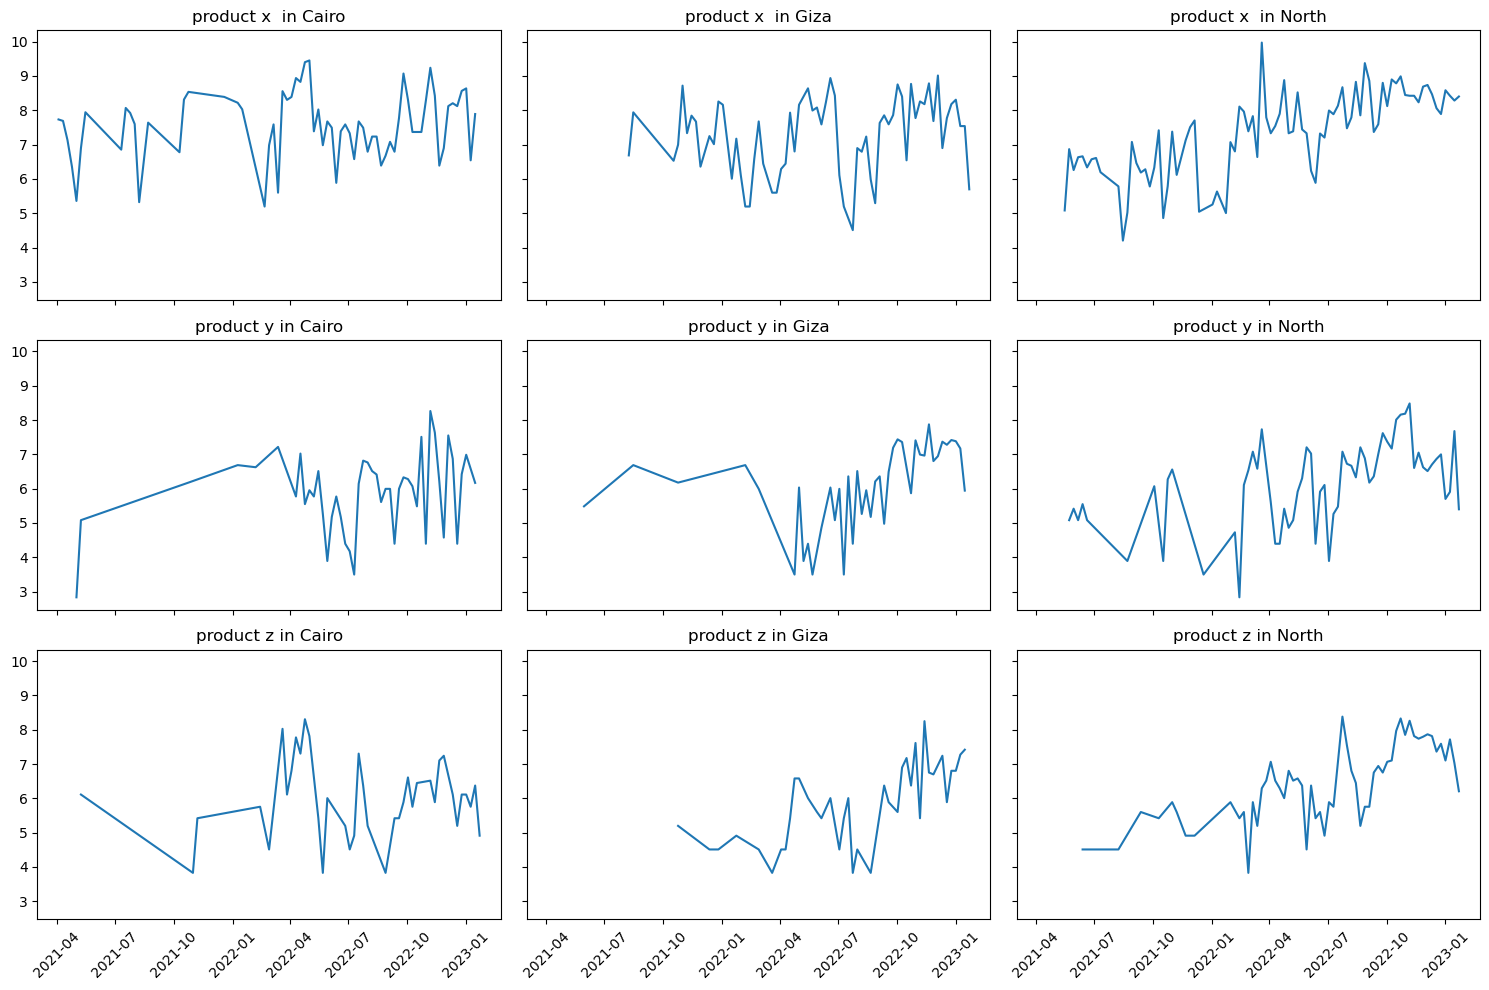

In [37]:
# Group by product_name and city before resampling
data_grouped = final_data .groupby(['product_name', 'city', pd.Grouper(freq='W')]).sum().reset_index()

# Example: resampling on a weekly basis with aggregation
data_grouped['log_sales'] = np.log1p(data_grouped['sales'])  # Apply log transform

products = data_grouped['product_name'].unique()
cities = data_grouped['city'].unique()

# Plotting
fig, axs = plt.subplots(len(products), len(cities), figsize=(15, 10), sharex=True, sharey=True)

for i, product in enumerate(products):
    for j, city in enumerate(cities):
        city_product_data = data_grouped[(data_grouped['product_name'] == product) & (data_grouped['city'] == city)]
        axs[i, j].plot(city_product_data['date'], city_product_data['log_sales'], label=f'{product} in {city}')
        axs[i, j].set_title(f'{product} in {city}')
        axs[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


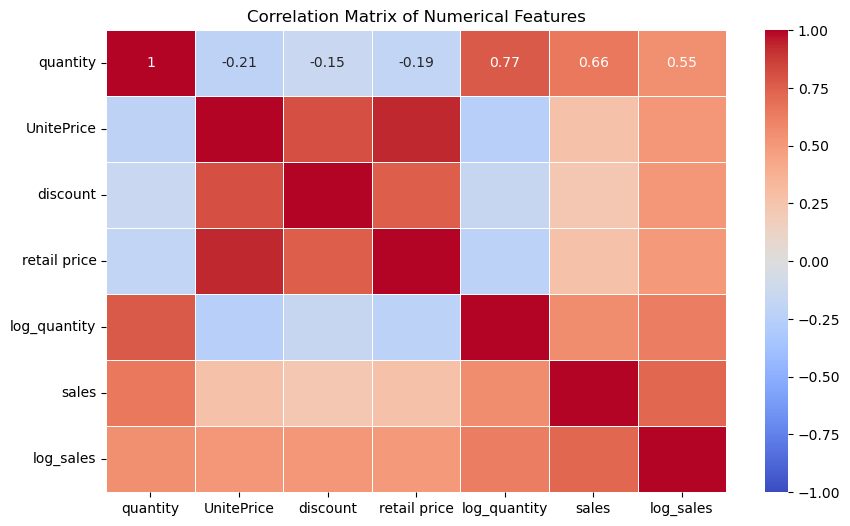

In [38]:
# 3. Checking Correlations Between Numerical Variables

numerical_cols = ['quantity', 'UnitePrice', 'discount', 'retail price', 'log_quantity','sales','log_sales']

# Generate correlation matrix
corr_matrix = final_data [numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [39]:
final_data

,quantity,UnitePrice,discount,retail price,product_name,area,city,log_quantity,sales,log_sales
date,,,,,,,,,,
2021-03-31,5.000000,102.000000,33.0,102.000000,product x,El-Mokattam,Cairo,1,510.00,6.236370
2021-04-01,4.866667,99.133333,32.2,99.133333,product x,Nasr City,Cairo,1,482.45,NaN
2021-04-02,4.733333,96.266667,31.4,96.266667,product x,Nasr City,Cairo,1,455.66,NaN
2021-04-03,4.600000,93.400000,30.6,93.400000,product x,Nasr City,Cairo,1,429.64,NaN
2021-04-04,4.466667,90.533333,29.8,90.533333,product x,Nasr City,Cairo,1,404.38,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-17,5.000000,99.000000,28.0,99.000000,product x,Fleming,North,1,495.00,6.206576
2023-01-17,3.000000,99.000000,29.0,99.000000,product x,Faisal,Giza,1,297.00,5.697093
2023-01-17,1.000000,99.000000,27.0,99.000000,product x,El-Ibrahimia,North,0,99.00,4.605170


In [40]:
#Handle the rest of missing values 

missing_dates = pd.date_range(start=final_data.index.min(), end=final_data.index.max()).difference(final_data.index)
print(f"Missing dates: {missing_dates}")


Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [41]:
date_range = final_data.index.min(), final_data.index.max()
date_range


(Timestamp('2021-03-31 00:00:00'), Timestamp('2023-01-17 00:00:00'))

In [42]:
# Group by 'date', 'product_name', and 'city', then sum the 'sales' for each 'area'
grouped_data = final_data.groupby(['date', 'product_name', 'city'])['sales'].sum().reset_index()

# Show the result
grouped_data

,date,product_name,city,sales
0,2021-03-31,product x,Cairo,510.00
1,2021-04-01,product x,Cairo,482.45
2,2021-04-02,product x,Cairo,455.66
3,2021-04-03,product x,Cairo,429.64
4,2021-04-04,product x,Cairo,404.38
...,...,...,...,...
1778,2023-01-16,product y,North,220.00
1779,2023-01-16,product z,Cairo,135.00
1780,2023-01-16,product z,North,495.00
1781,2023-01-17,product x,Giza,297.00


In [43]:
grouped_data.index = pd.to_datetime(grouped_data.index)


/Users/ayasamir/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


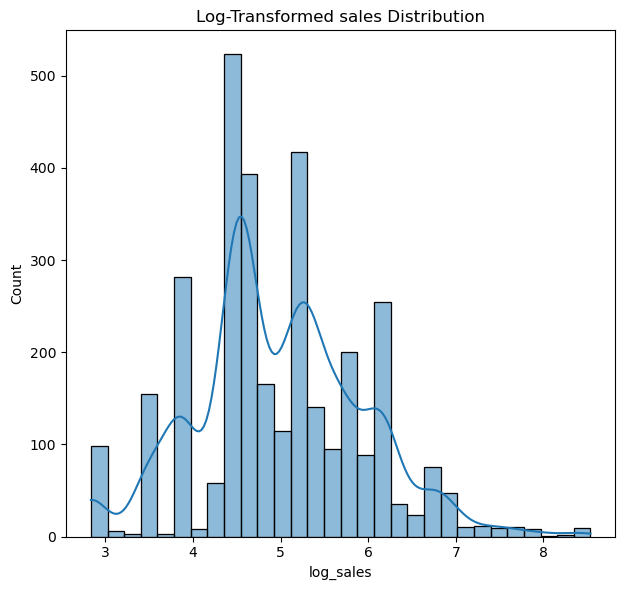

In [44]:
# Apply log transformation to the 'quantity' column
final_data['log_sales'] = np.log1p(final_data['sales'])  # log(1 + quantity)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.histplot(final_data['log_sales'], bins=30, kde=True)
plt.title('Log-Transformed sales Distribution')

plt.tight_layout()
plt.show()



In [45]:
# Check for missing values in each column
missing_values = final_data.isnull().sum()

missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


## Time Series Analysis 

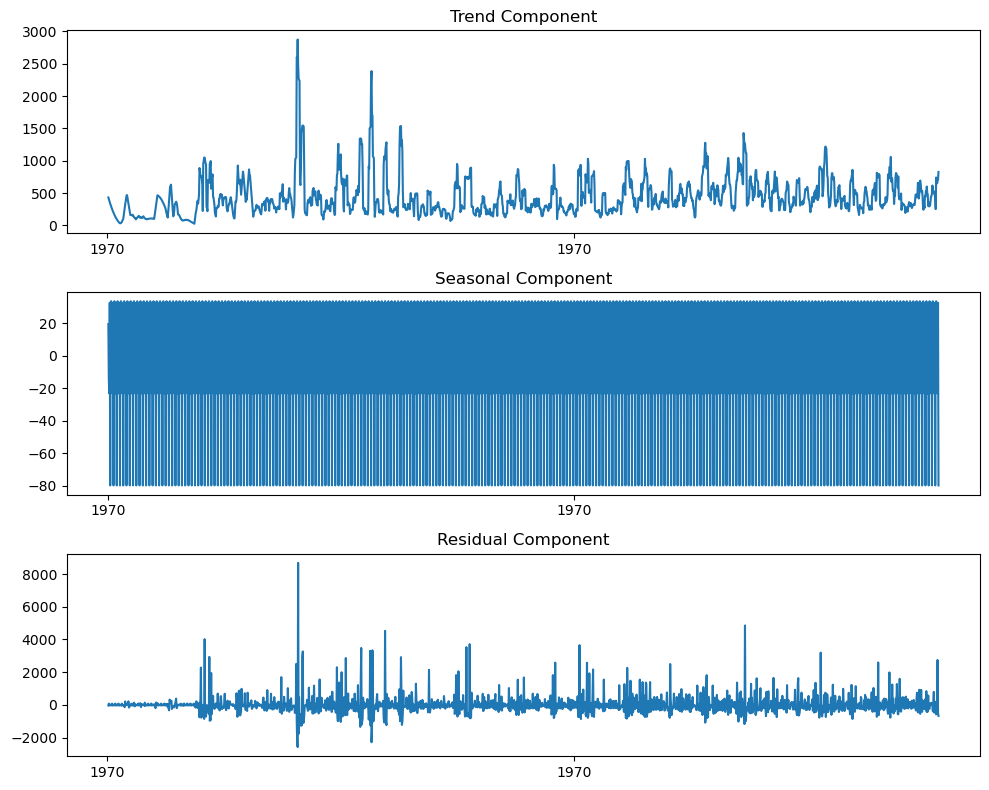

In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(grouped_data['sales'], model='additive', period=7)  # Assuming weekly seasonality

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonal Component')

plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [47]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on sales data
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("The series is non-stationary, consider differencing (d>0).")
    else:
        print("The series is stationary (d=0).")

check_stationarity(grouped_data['sales'])


ADF Statistic: -9.523699869273909
p-value: 3.0171002243077486e-16
The series is stationary (d=0).


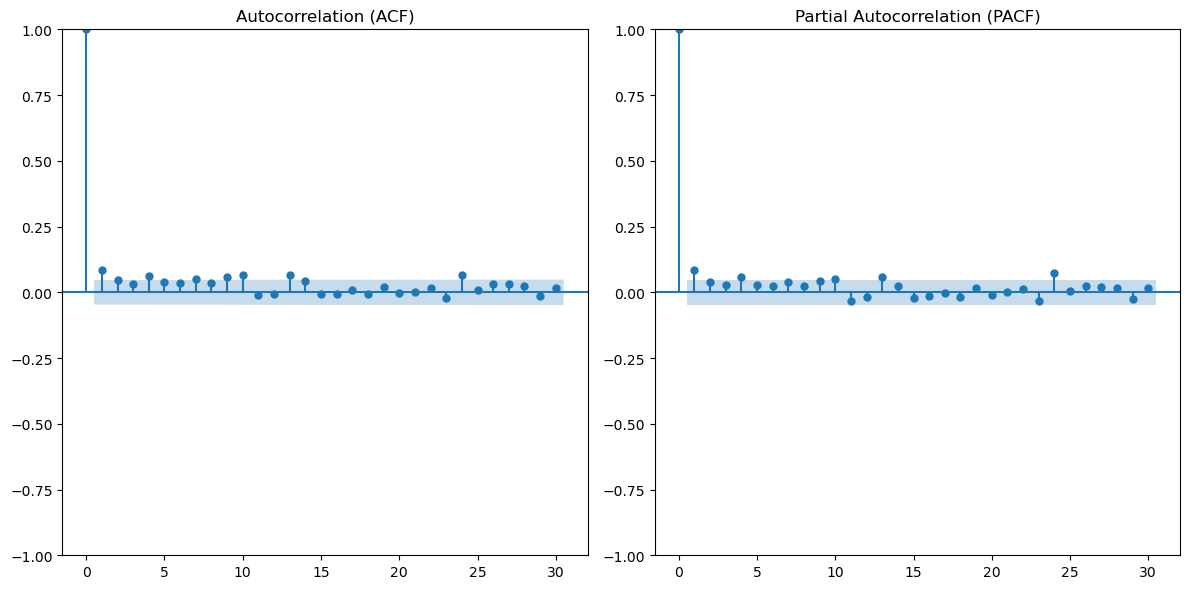

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(grouped_data['sales'].dropna(), lags=30, ax=plt.gca())  # Drop any missing values
plt.title('Autocorrelation (ACF)')

plt.subplot(122)
plot_pacf(grouped_data['sales'].dropna(), lags=30, ax=plt.gca())  # Drop any missing values
plt.title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()


In [49]:
from pmdarima import auto_arima

# Fit auto_arima to find the best (p, d, q)
model = auto_arima(grouped_data['sales'], start_p=0, start_q=0,
                   max_p=5, max_q=5, seasonal=False,
                   stepwise=True, trace=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29402.411, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28939.105, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28312.328, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29400.412, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28307.091, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28308.164, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=28307.432, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=28755.075, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=28305.554, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=28310.723, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=28937.105, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=28306.646, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]        

In [50]:

# ARIMA(0, 0, 1): No differencing is needed
model_1 = ARIMA(grouped_data['sales'], order=(0, 0, 1)).fit()

# Compare AIC and BIC values with previously fitted models
print(f'ARIMA(0, 0, 1) AIC: {model_1.aic}')
print(f'ARIMA(0, 0, 1) BIC: {model_1.bic}')


ARIMA(0, 0, 1) AIC: 28330.442815302635
ARIMA(0, 0, 1) BIC: 28346.900973156226


/Users/ayasamir/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ayasamir/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ayasamir/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [51]:

model = ARIMA(grouped_data['sales'], order=(0, 0, 1))  
result = model.fit()


/Users/ayasamir/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ayasamir/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ayasamir/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [52]:
# Extract ARIMA features
grouped_data['arima_residuals'] = result.resid  # Residuals (errors)
grouped_data['arima_fitted'] = result.fittedvalues  # Fitted values (trend)


In [53]:
# Step 3: Create lag features
grouped_data['sales_lag_1'] = grouped_data['sales'].shift(1)  # Sales from the previous day
grouped_data['sales_lag_7'] = grouped_data['sales'].shift(7)  # Sales from a week ago

# Step 4: Add rolling statistics (rolling mean and rolling std)
grouped_data['rolling_mean_7'] = grouped_data['sales'].rolling(window=7).mean()  # 7-day rolling mean
grouped_data['rolling_std_7'] = grouped_data['sales'].rolling(window=7).std()   # 7-day rolling std


In [54]:
# Step 5: Decompose the time series (seasonal, trend, residual components)
decomposition = seasonal_decompose(grouped_data['sales'], model='additive', period=7)
grouped_data['seasonal'] = decomposition.seasonal
grouped_data['trend'] = decomposition.trend
grouped_data['residual'] = decomposition.resid

In [55]:
grouped_data

,date,product_name,city,sales,arima_residuals,arima_fitted,sales_lag_1,sales_lag_7,rolling_mean_7,rolling_std_7,seasonal,trend,residual
1970-01-01 00:00:00.000000000,2021-03-31,product x,Cairo,510.00,69.112496,440.887504,NaN,NaN,NaN,NaN,19.665436,NaN,NaN
1970-01-01 00:00:00.000000001,2021-04-01,product x,Cairo,482.45,36.181220,446.268780,510.00,NaN,NaN,NaN,-14.717517,NaN,NaN
1970-01-01 00:00:00.000000002,2021-04-02,product x,Cairo,455.66,11.938150,443.721850,482.45,NaN,NaN,NaN,-23.083858,NaN,NaN
1970-01-01 00:00:00.000000003,2021-04-03,product x,Cairo,429.64,-12.182744,441.822744,455.66,NaN,NaN,NaN,32.759795,431.168571,-34.288366
1970-01-01 00:00:00.000000004,2021-04-04,product x,Cairo,404.38,-35.553103,439.933103,429.64,NaN,NaN,NaN,-79.694030,405.911429,78.162601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000001778,2023-01-16,product y,North,220.00,-459.260562,679.260562,3465.00,396.0,714.857143,1222.391158,19.665436,703.857143,-503.522579
1970-01-01 00:00:00.000001779,2023-01-16,product z,Cairo,135.00,-269.908840,404.908840,220.00,594.0,649.285714,1242.106506,-14.717517,826.000000,-676.282483
1970-01-01 00:00:00.000001780,2023-01-16,product z,North,495.00,75.257267,419.742733,135.00,220.0,688.571429,1230.561235,-23.083858,NaN,NaN
1970-01-01 00:00:00.000001781,2023-01-17,product x,Giza,297.00,-149.783190,446.783190,495.00,190.0,703.857143,1223.982901,32.759795,NaN,NaN


In [56]:
# Handle missing values in the dataset

# 1. Lag features: Forward fill NaN values for lagged columns
grouped_data['sales_lag_1'].fillna(method='ffill', inplace=True)
grouped_data['sales_lag_7'].fillna(method='ffill', inplace=True)

# 2. Rolling statistics: Forward fill or backfill NaN values
grouped_data['rolling_mean_7'].fillna(method='ffill', inplace=True)
grouped_data['rolling_std_7'].fillna(method='ffill', inplace=True)

# 3. Seasonal, Trend, and Residual components: Forward fill or interpolate
grouped_data['seasonal'].fillna(method='ffill', inplace=True)
grouped_data['trend'].fillna(method='ffill', inplace=True)
grouped_data['residual'].fillna(method='ffill', inplace=True)

# For any remaining NaN values that might persist, you can also do:
# Fill remaining NaN values with backward fill (as a fallback if necessary)
grouped_data.fillna(method='bfill', inplace=True)

# Optional: You can also remove rows that still have NaN if needed
# grouped_data.dropna(inplace=True)

# Check the updated dataset for any remaining NaN values
print(grouped_data.isnull().sum())


date               0
product_name       0
city               0
sales              0
arima_residuals    0
arima_fitted       0
sales_lag_1        0
sales_lag_7        0
rolling_mean_7     0
rolling_std_7      0
seasonal           0
trend              0
residual           0
dtype: int64


/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_32153/754084934.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped_data['sales_lag_1'].fillna(method='ffill', inplace=True)
/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_32153/754084934.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped_data['sales_lag_1'].fillna(method='ffill', inplace=True)
/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_

In [57]:
grouped_data.reset_index(drop=True, inplace=True)

# Ensure the 'date' column is in datetime format
grouped_data['date'] = pd.to_datetime(grouped_data['date'])

# Set 'date' as the index
grouped_data.set_index('date', inplace=True)


In [58]:
grouped_data

,product_name,city,sales,arima_residuals,arima_fitted,sales_lag_1,sales_lag_7,rolling_mean_7,rolling_std_7,seasonal,trend,residual
date,,,,,,,,,,,,
2021-03-31,product x,Cairo,510.00,69.112496,440.887504,510.00,510.0,431.168571,55.407206,19.665436,431.168571,-34.288366
2021-04-01,product x,Cairo,482.45,36.181220,446.268780,510.00,510.0,431.168571,55.407206,-14.717517,431.168571,-34.288366
2021-04-02,product x,Cairo,455.66,11.938150,443.721850,482.45,510.0,431.168571,55.407206,-23.083858,431.168571,-34.288366
2021-04-03,product x,Cairo,429.64,-12.182744,441.822744,455.66,510.0,431.168571,55.407206,32.759795,431.168571,-34.288366
2021-04-04,product x,Cairo,404.38,-35.553103,439.933103,429.64,510.0,431.168571,55.407206,-79.694030,405.911429,78.162601
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,product y,North,220.00,-459.260562,679.260562,3465.00,396.0,714.857143,1222.391158,19.665436,703.857143,-503.522579
2023-01-16,product z,Cairo,135.00,-269.908840,404.908840,220.00,594.0,649.285714,1242.106506,-14.717517,826.000000,-676.282483
2023-01-16,product z,North,495.00,75.257267,419.742733,135.00,220.0,688.571429,1230.561235,-23.083858,826.000000,-676.282483


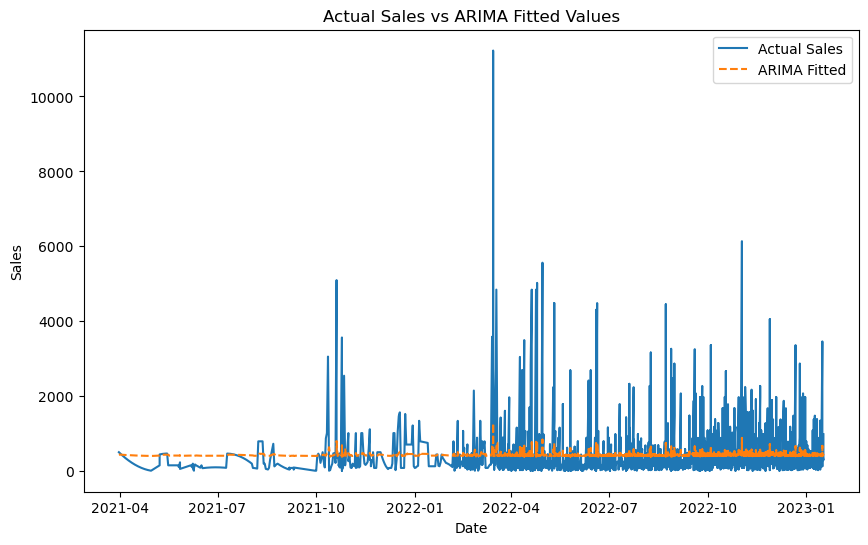

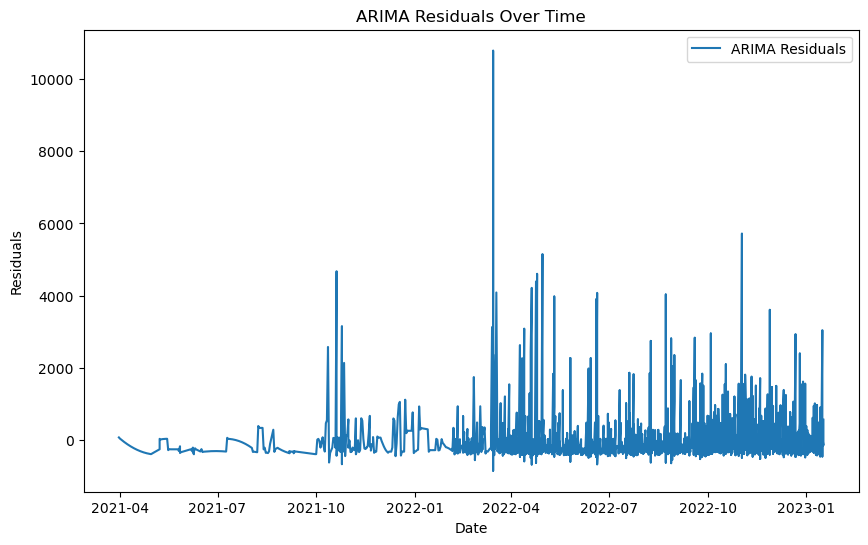

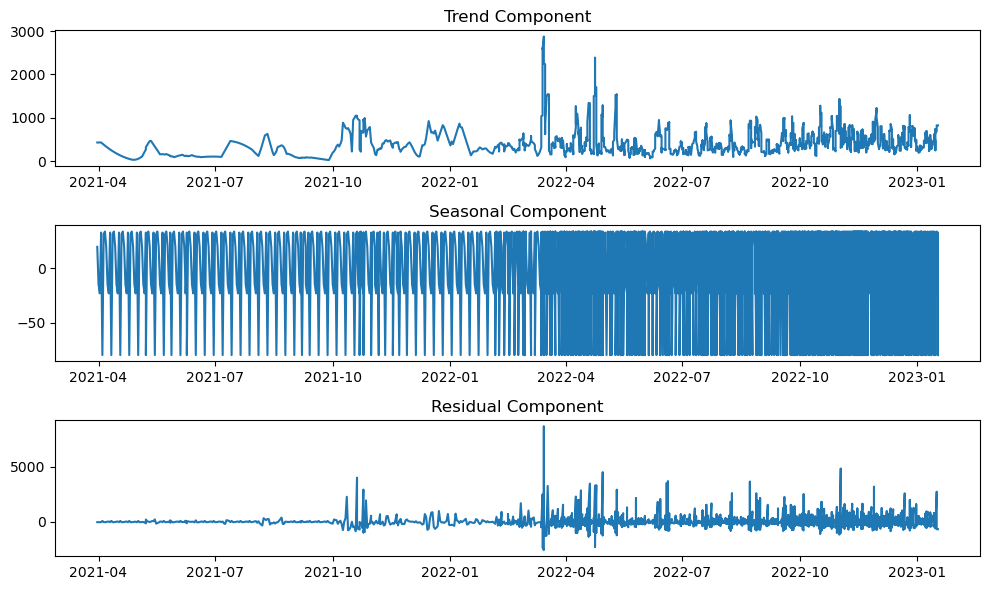

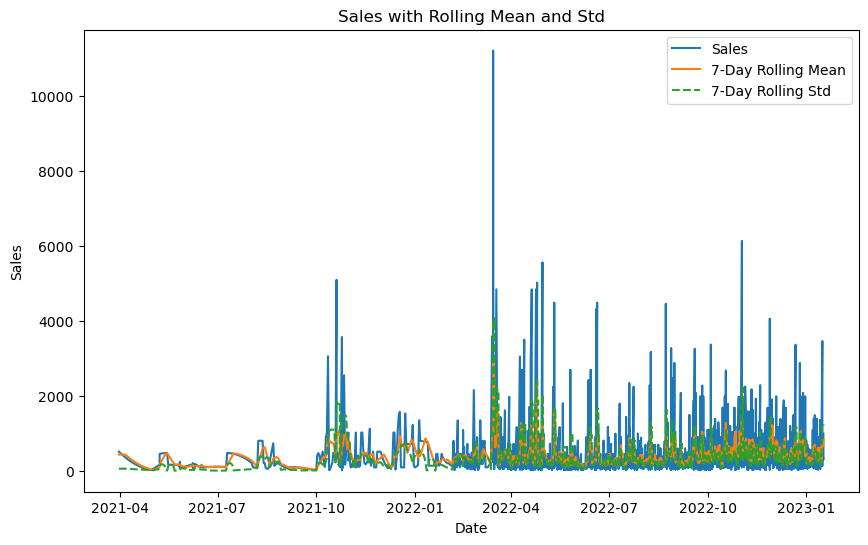

In [59]:


# 2. Plot ARIMA fitted values vs actual sales
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['sales'], label='Actual Sales')
plt.plot(grouped_data.index, grouped_data['arima_fitted'], label='ARIMA Fitted', linestyle='--')
plt.title('Actual Sales vs ARIMA Fitted Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 3. Plot residuals of ARIMA model
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['arima_residuals'], label='ARIMA Residuals')
plt.title('ARIMA Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 4. Plot seasonal, trend, and residual components from decomposition
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(grouped_data.index, grouped_data['trend'], label='Trend')
plt.title('Trend Component')

plt.subplot(3, 1, 2)
plt.plot(grouped_data.index, grouped_data['seasonal'], label='Seasonality')
plt.title('Seasonal Component')

plt.subplot(3, 1, 3)
plt.plot(grouped_data.index, grouped_data['residual'], label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

# 5. Plot rolling statistics (mean and std)
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['sales'], label='Sales')
plt.plot(grouped_data.index, grouped_data['rolling_mean_7'], label='7-Day Rolling Mean')
plt.plot(grouped_data.index, grouped_data['rolling_std_7'], label='7-Day Rolling Std', linestyle='--')
plt.title('Sales with Rolling Mean and Std')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Step 2: Prepare Dataset for Global Model


In [60]:
grouped_data

,product_name,city,sales,arima_residuals,arima_fitted,sales_lag_1,sales_lag_7,rolling_mean_7,rolling_std_7,seasonal,trend,residual
date,,,,,,,,,,,,
2021-03-31,product x,Cairo,510.00,69.112496,440.887504,510.00,510.0,431.168571,55.407206,19.665436,431.168571,-34.288366
2021-04-01,product x,Cairo,482.45,36.181220,446.268780,510.00,510.0,431.168571,55.407206,-14.717517,431.168571,-34.288366
2021-04-02,product x,Cairo,455.66,11.938150,443.721850,482.45,510.0,431.168571,55.407206,-23.083858,431.168571,-34.288366
2021-04-03,product x,Cairo,429.64,-12.182744,441.822744,455.66,510.0,431.168571,55.407206,32.759795,431.168571,-34.288366
2021-04-04,product x,Cairo,404.38,-35.553103,439.933103,429.64,510.0,431.168571,55.407206,-79.694030,405.911429,78.162601
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,product y,North,220.00,-459.260562,679.260562,3465.00,396.0,714.857143,1222.391158,19.665436,703.857143,-503.522579
2023-01-16,product z,Cairo,135.00,-269.908840,404.908840,220.00,594.0,649.285714,1242.106506,-14.717517,826.000000,-676.282483
2023-01-16,product z,North,495.00,75.257267,419.742733,135.00,220.0,688.571429,1230.561235,-23.083858,826.000000,-676.282483


## Feature Encoding and Engineering

In [61]:
# Encode categorical features like city and product_name
grouped_data['city_encoded'] = grouped_data['city'].astype('category').cat.codes
grouped_data['product_encoded'] = grouped_data['product_name'].astype('category').cat.codes

# Add 'day of week', 'month', and 'is_weekend' features
grouped_data['day_of_week'] = grouped_data.index.dayofweek
grouped_data['month'] = grouped_data.index.month
grouped_data['is_weekend'] = grouped_data['day_of_week'].isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday

# Interaction between city and product
grouped_data['city_product_interaction'] = grouped_data['city_encoded'] * grouped_data['product_encoded']

# Add Exponential Moving Average (EMA) for 7 days
grouped_data['ema_7'] = grouped_data['sales'].ewm(span=7, adjust=False).mean()

# Encode categorical features like city and product_name
grouped_data['city_encoded'] = grouped_data['city'].astype('category').cat.codes
grouped_data['product_encoded'] = grouped_data['product_name'].astype('category').cat.codes

# Add time-based features
grouped_data['day_of_week'] = grouped_data.index.dayofweek
grouped_data['month'] = grouped_data.index.month
grouped_data['is_weekend'] = grouped_data['day_of_week'].isin([5, 6]).astype(int)

# Add interaction features
grouped_data['city_product_interaction'] = grouped_data['city_encoded'] * grouped_data['product_encoded']

# Add Exponential Moving Average (EMA)
grouped_data['ema_7'] = grouped_data['sales'].ewm(span=7, adjust=False).mean()



### Aggregation and Grouping

In [62]:
# Grouping the data by 'date', 'city', and 'product_name'
# Aggregate the sales (target) and the necessary features 
grouped_data = grouped_data.groupby(['date', 'city', 'product_name']).agg({
    'sales': 'sum', 
    'sales_lag_1': 'mean',  
    'sales_lag_7': 'mean',
    'rolling_mean_7': 'mean',
    'rolling_std_7': 'mean',
    'arima_residuals': 'mean',
    'arima_fitted': 'mean',
    'seasonal': 'mean',
    'trend': 'mean',
    'residual': 'mean',
    'city_encoded': 'first',  
    'product_encoded': 'first',
    'day_of_week': 'first',
    'month': 'first',
    'is_weekend': 'first',
    'city_product_interaction': 'first',
    'ema_7': 'mean'
}).reset_index()  


### Preparing Features and Target

In [63]:

X = grouped_data[['sales_lag_1', 'sales_lag_7', 'rolling_mean_7', 'rolling_std_7', 
                  'arima_residuals', 'arima_fitted', 'seasonal', 'trend', 'residual',
                  'city_encoded', 'product_encoded', 'day_of_week', 'month', 'is_weekend', 
                  'city_product_interaction', 'ema_7']]

y = grouped_data['sales']  # Target variable: sales

X_clean = X
y_clean = y.loc[X_clean.index]  


In [72]:

print(f"Length of X_clean: {len(X_clean)}")
print(f"Length of y_clean: {len(y_clean)}")


Length of X_clean: 1783
Length of y_clean: 1783


### Model Trainning & Evaluation

In [65]:

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, shuffle=False)

model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
predictions = model.predict(X_test)


In [67]:
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 36.44033286851529
MAE: 13.338770833669924


/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


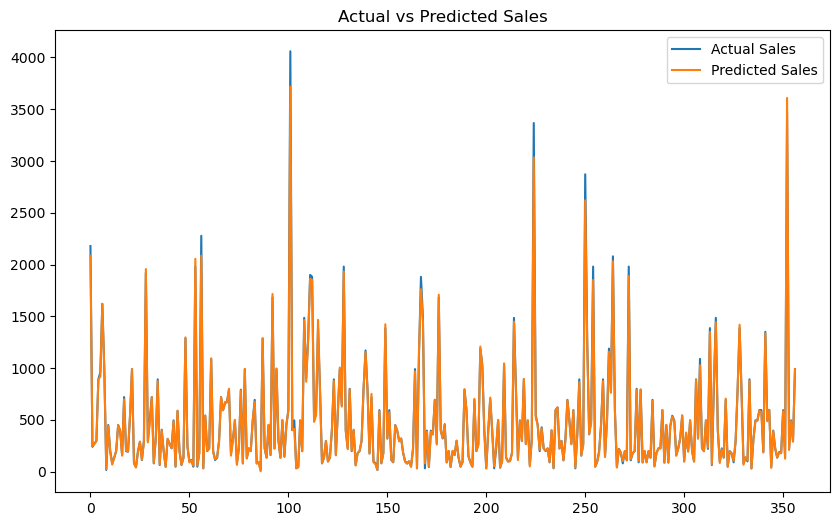

In [68]:
#visualize the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()




In [69]:
# Remove leading and trailing whitespace from 'city' and 'product_name' columns
grouped_data['city'] = grouped_data['city'].str.strip()
grouped_data['product_name'] = grouped_data['product_name'].str.strip()

# Verify if the whitespace has been removed
grouped_data[['city', 'product_name']]



,city,product_name
0,Cairo,product x
1,Cairo,product x
2,Cairo,product x
3,Cairo,product x
4,Cairo,product x
...,...,...
1778,North,product x
1779,North,product y
1780,North,product z
1781,Giza,product x


#### Test for Specific City and Product (Next 10 Days Prediction)


X_test_city_product Length: 40
y_test_city_product Length: 40
Predicted Sales for the Next 10 Days (Specific City & Product):
[889.31683 188.82423 202.10568 196.02437 201.06827 299.09534 500.21677
 197.89568 588.0826  492.02914]
Actual Sales for the Next 10 Days (Specific City & Product):
[891. 198. 198. 198. 198. 297. 495. 198. 594. 495.]


/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_32153/2108942008.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_city_product = X_test[(grouped_data['city'] == city) & (grouped_data['product_name'] == product)]


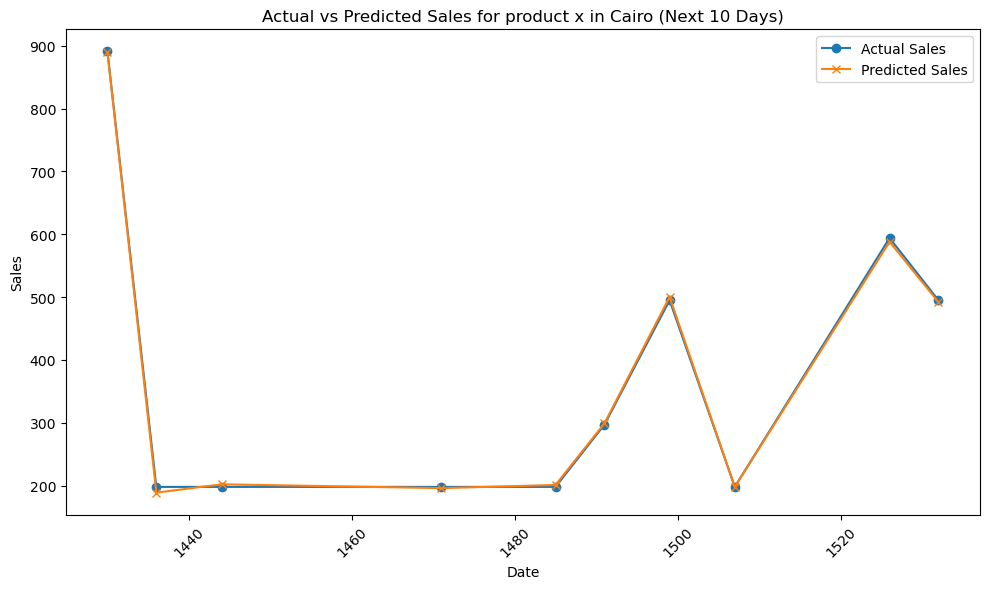

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the specific city and product you want to test
city = 'Cairo'
product = 'product x'

# Filter the test set for this specific city and product
X_test_city_product = X_test[(grouped_data['city'] == city) & (grouped_data['product_name'] == product)]
y_test_city_product = y_test[(grouped_data['city'] == city) & (grouped_data['product_name'] == product)]

# Ensure the lengths are still consistent
print(f"X_test_city_product Length: {len(X_test_city_product)}")
print(f"y_test_city_product Length: {len(y_test_city_product)}")

# Make predictions for the filtered test set (city & product specific)
predictions_city_product = model.predict(X_test_city_product)

# For visualization, let's limit to the next 10 days if necessary
predicted_sales = predictions_city_product[:10]
actual_sales = y_test_city_product[:10]

# Print the predicted and actual values for the next 10 days
print("Predicted Sales for the Next 10 Days (Specific City & Product):")
print(predicted_sales)

print("Actual Sales for the Next 10 Days (Specific City & Product):")
print(actual_sales.values)

# Visualize the actual vs predicted sales for the specific city and product
plt.figure(figsize=(10, 6))
plt.plot(actual_sales.index, actual_sales.values, label='Actual Sales', marker='o')
plt.plot(actual_sales.index, predicted_sales, label='Predicted Sales', marker='x')
plt.title(f'Actual vs Predicted Sales for {product} in {city} (Next 10 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
